# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
# Import your chosen baseline model
# Example: from sklearn.linear_model import LogisticRegression


Mounted at /content/drive


## Model Choice

[Explain why you've chosen a particular model as the baseline. This could be a simple statistical model or a basic machine learning model. Justify your choice.]


## Feature Selection

[Indicate which features from the dataset you will be using for the baseline model, and justify your selection.]


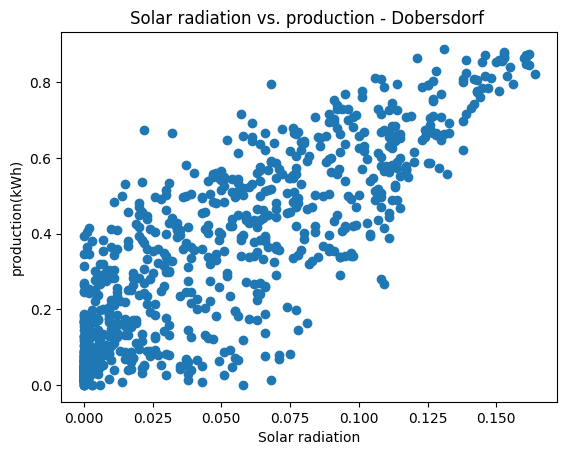

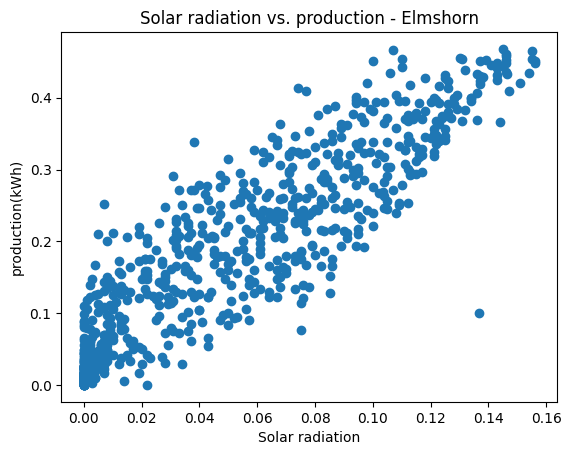

X nan: False
y nan: False
X inf: False
y inf: False
X nan: False
y nan: False
X inf: False
y inf: False


In [17]:
from math import nan
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dobersdorf_all_cut.csv', sep=";", decimal=",", header=0)
df_elmshorn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Elmshorn_PV.csv', sep=";", decimal=",", header=0)


# Feature selection
# Example: Selecting only two features for a simple baseline model
X = df[['Sun','Tavg']]
y = df['Produktion(kWH)']
n_y= y/100
n_x= X/100

X1 = df_elmshorn['Sun']
y1 = df_elmshorn['Power Generation [kWh]']
n_y1= y1/100
n_x1= X1/100


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2, random_state=42)

##elmshorn
X_train1, X_test1, y_train1, y_test1 = train_test_split(n_x1, n_y1, test_size=0.2, random_state=42)
###Dobersdorf
plt.scatter(n_x['Sun'], n_y)
plt.xlabel('Solar radiation')
plt.ylabel('production(kWh)')
plt.title('Solar radiation vs. production - Dobersdorf ')
plt.show()

##elmshorn
plt.scatter(n_x1, n_y1)
plt.xlabel('Solar radiation')
plt.ylabel('production(kWh)')
plt.title('Solar radiation vs. production - Elmshorn')
plt.show()


X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)

print("X nan:", np.isnan(X_train).any())
print("y nan:", np.isnan(y_train).any())
print("X inf:", np.isinf(X_train).any())
print("y inf:", np.isinf(y_train).any())

X_train1 = np.nan_to_num(X_train1, nan=0.0, posinf=0.0, neginf=0.0)
print("X nan:", np.isnan(X_train1).any())
print("y nan:", np.isnan(y_train1).any())
print("X inf:", np.isinf(X_train1).any())
print("y inf:", np.isinf(y_train1).any())





## Implementation

[Implement your baseline model here.]



In [18]:
from tensorflow import keras



model = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1)
])


# TODO Compile the model
model.compile(
loss= keras.losses.MeanSquaredError(),
optimizer= keras.optimizers.Adam(learning_rate=0.001),
metrics=["mae"]
               )


model.fit(X_train,y_train,batch_size=16, epochs=50)


###for Elmshorn



model1 = keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1)
])


# TODO Compile the model
model1.compile(
loss= keras.losses.MeanSquaredError(),
optimizer= keras.optimizers.Adam(learning_rate=0.001),
metrics=["mae"]
               )


model1.fit(X_train1,y_train1,batch_size=16, epochs=50)




Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1308 - mae: 0.2694
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0914 - mae: 0.2319
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0708 - mae: 0.2137
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0571 - mae: 0.2021
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0545 - mae: 0.2000
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0507 - mae: 0.1938
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488 - mae: 0.1893
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0458 - mae: 0.1852
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0445 - mae: 0.1815
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0420 - mae: 0.1741
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0393 - mae: 0.1705
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0390 - mae: 0.1695
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [19]:
# Evaluate the baseline model

model.evaluate(X_train,y_train)

# TODO Make predictions
forecast = model.predict(X_test)
mse = mean_squared_error(y_test, forecast)
print(mse)


###for Elmshorn
# Evaluate the baseline model

model1.evaluate(X_train1,y_train1)


forecast1 = model1.predict(X_test1)
mse1 = mean_squared_error(y_test1, forecast1)
print(mse1)




22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - mae: 0.0880  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.01325428619461983
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - mae: 0.0460  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.0029645471252040772
